# Code to simulate the specific heat signature of glasses with a specified thermal treatment following the Tool-Narayanaswamy-Moynihan (TNM) model

An introduction to the the ```PyGlass``` library is provided. For the moment in only contains the class type ```Glass```, so here it is described how to use this class to generate multiple glassy systems and obtain its specific heat signature. It should be use, as it is now, for didactic purposes maybe, not scientific ones unless you understand what you're doing. Besides, it has not been thourougly scrutinized to check its overall consistency.

## The  Tool-Narayanaswamy-Moynihan
Here goes a brief introduction of what's the TNM that I'll complete once I have time! Meanwhile some literature:
- [One of Tool's original paper](https://nvlpubs.nist.gov/nistpubs/jres/6/jresv6n4p523_A2b.pdf)
- [Moynihan's original's paper](https://doi.org/10.1111/j.1151-2916.1976.tb09376.x)
- [One of Narayanaswamy original's paper](https://doi.org/10.1111/j.1151-2916.1978.tb09259.x)
- Other papers with more literature: [Svoboda _et al._](https://doi.org/10.1016/j.jnoncrysol.2013.07.008), [Hutchinson _et al._](https://doi.org/10.1021/ma992015r),... to be completed

In short (very short for now), it calculates the fictive temperature $T_f$ through the following equation:

$T_{f,n} = T_0 + \sum_{j=1}^n \Delta T_j\{1-\exp[-(\sum_{k=j}^n \Delta T_k/q_k \tau_k)^\beta]\}$

where the $T_0$ is the initial temperature, $q$ the heating/cooling rate, $\tau$ the relaation time, $\beta$ the stretching factor. In case of an annealing, the inner summation is substituted by $\Delta t_{e,k}/\tau_k$ (equivalent to the time step $\Delta t = \Delta T /q$ from the ramping step), where $t_e$ is the annealing time.

## Example of use of the ``Glass`` class

First, we need to import the basic libraries that will be useful for this script. Among them, the module PyGlass that contains (only, for the moment) the ``Glass`` class that we'll use to create a 'glass type' object.

In [1]:
# Plot as PNG figure
%matplotlib inline
# Plot interactive figures
#%matplotlib notebook 
import numpy as np
from matplotlib import pyplot as plt
from PyGlass import Glass
import os

First we can creat a glass instance by calling the ```glass``` class from the pyglass library. We call it by passing two arguments, the model (string that should be either 'tnm' or 'agv') and the parameters (a list), which should go in the order of the according method, that is:
- TNM: parameters = [$\ln A$, $x$, $\beta$, $\Delta H/R$] according to

$$\tau(T,T_f) =  A e ^{\frac{\Delta H}{R} \left(\frac{x}{T} + \frac{1-x}{T_f}\right)}$$
- AGV: parameters = [$D$, $T0$, $\beta$, $\log(\tau_0)$]
$$\tau(T,T_f) =  \tau_0 e ^{\frac{D T_0}{T\left(1 - T_0/T_f \right)}}$$

and where $\beta$ is the streching exponent that takes into account the dispersion in relaxation times.

In [2]:
tpd = Glass(model = 'tnm',parameters=[-125, 0.7, 0.8, 42638])

Info: your glass will obey the tnm  relaxation model
Info: Using the parameters [-125, 0.7, 0.8, 42638]


We have now created the object ```tpd``` which has the glass class. Several methods can be now done to this object.

You can add different treatments to your system, assuming always that you'll start from the liquid (as it is required for the model). The two methods are ```ramp``` and ```annealing```.
- In the ramp you have to specify the rate in K/min and its sign depending either it is a cooling or a heating together with the final temperature you want to reach. The initial temperature is passed as the third argument and only required for the first thermal treatment. The temperature step used in the simulation can also be specified, the default is 0.5 K.
- In the annealing you have to specify the initial time ($t_0$) and final time ($t_1$) as 10^${t_0}$ and 10^$t_1$. The number of steps taken during the annealing can also be specified, otherwise it takes 5 steps per decade as default.

Here there's an example of a glass that follow a 'tnm'-like relaxation.

In [3]:
tpd.ramp(-10,270,380) # We cool the glass at 10 K/min t0 270 K sarting from 380 K
tpd.annealing(-2,5,500) # We perform an annealing of 100000 s using 500 steps
tpd.ramp(10,380) # We heat our sample at 10 K/min up to 380 K again

Info: preparing  cooling scan at 1e+01 K/min
Info: preparing  heating scan at 1e+01 K/min


The thermal treatment is now programmed. Everything is correct (temperature limits, etc) and makes sense, otherwise an error would have raised. We can now start the thermal treatment (like if we press start in the DSC program) using the method ```start_treatment()```

In [4]:
tpd.start_treatment()

It can take a while, depending on the number of steps. The algorithm could be optimized, but if you do not use a too small dT, it is ok.

If everything has gone ok, you have now the results in the different attributes of the glass class object we have created which are arrays that can be called as:
- ```tpd.Tsystem```
- ```tpd.Tfictive```
- ```tpd.tau```
- ```tpd.cpnorm```
- ```tpd.time```

and some others which are not so often used. For instance we could plot the normalized heat capacity as:

Text(0,0.5,'Normalized specific heat (a.u.)')

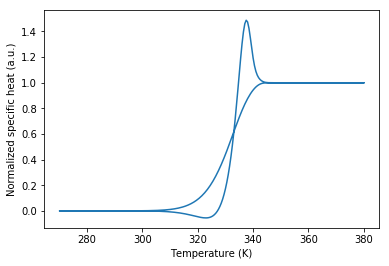

In [5]:
plt.plot(tpd.Tsystem, tpd.cpnorm)
plt.xlabel('Temperature (K)')
plt.ylabel('Normalized specific heat (a.u.)')

However, if we want a quick report of the results, we can call the method ```plot_report()```, which prints seom interesting graphs, as you can see:

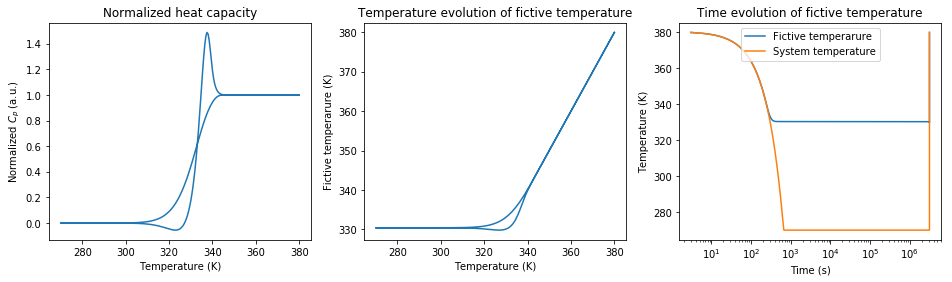

In [6]:
tpd.plot_report()

There is also a method to pass the normalized heat capacity to a specific heat given the polynomial coefficients of the liquid and glass regions. These coefficients can be passed as a list to the ```compute_cpe()``` method. This method can also take three extra arguments:
- ```safe = False```:  saves the data to a default log-file in the current folder unles specified
- ```output = 'filename'```: if safe is enabled you can pass a path to a file in a string format to save the data
- ```ttstep = integer```: if safe is enabled you can choose a specific thermal treatment step to save the data (normally the heating scan)

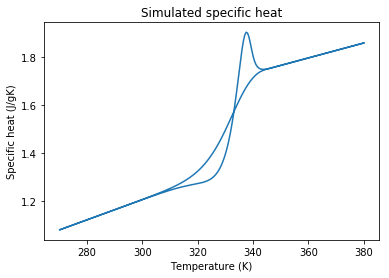

In [7]:
glass_coeff = [4.2e-3, -0.05284] # Not for tpd but for imc, but only for the tutorial purposes it works
liquid_coeff = [3.1e-3,0.68]
# The '2' means we are computing it for the third thermal treatment (remember python starts everyting at 0)
tpd.compute_cpe(liquid_coeff,glass_coeff)
# And plot the data which is a newly created attribute:
plt.plot(tpd.Tsystem,tpd.cpe)
plt.xlabel('Temperature (K)')
plt.ylabel('Specific heat (J/gK)')
plt.title('Simulated specific heat')
plt.show()

The data from the whole thermal history or a specific treatment step can be saved using the method ``save_history()``. Again, the path to a file an be specified using the ``output`` argument (otherwise used the default log-file) and the specific thermal step using the ``ttstep`` argument (saves all by default).

In [8]:
tpd.save_history(output='such_program_nice_peak_very_wow.log')

The thermal treatments and their indices limits to extract the good portions of the whole history vectors can be seen by printting the attribute ```treatments```, which is a list of 2-dim: the first one contains the indices limits of each step and the second on information of the respective step.

In [9]:
print('Those are the indices to cut the main vector into the different steps:\n', tpd.treatments[0])
print('These is the information for each different thermal treatment of each step:\n', tpd.treatments[1])

Those are the indices to cut the main vector into the different steps:
 [(0, 221), (221, 721), (721, 941)]
These is the information for each different thermal treatment of each step:
 ['cooling of 380 K to 270 K at 1.0e+01 K/min', 'annealing of 1e+05 s  at 270 K', 'heating of 270 K to 380 K at 1.0e+01 K/min']


## Other methods

- ```set_model```: allows to change the model even once the thermal history is defined
- ```set_parameters```: allows to change the parameters even once the thermal history is defined
- ```set_dtstep```: allows to change the global temperature step used. Must be specified before the definition of the thermal history, otherwise weird things might occur.


## Other examples

We can create a new glass object, for instance ``tpd2``, that will obey the agv relaxation. For that we use the VFT parameters for TPD from [Walters _et al._](https://doi.org/10.1063/1.4916649) and execute to it the same thermal treatment we've used for the other:

Info: your glass will obey the agv  relaxation model
Info: Using the parameters [13.491695635380458, 258.9, 0.8, -19.2]
Info: preparing  cooling scan at 1e+01 K/min
Info: preparing  heating scan at 1e+01 K/min


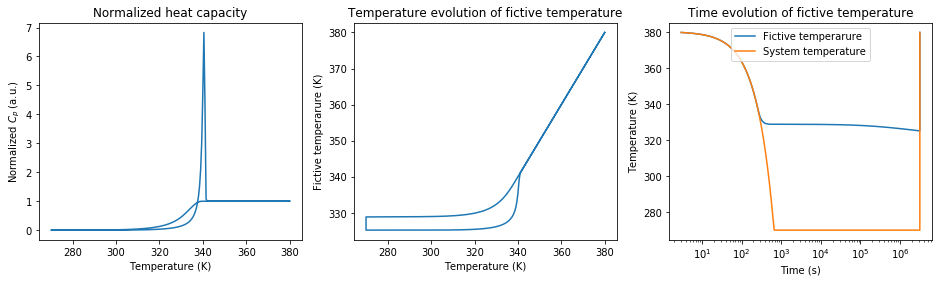

In [10]:
T0  = 258.9
D = 3493 / T0
tau0 = -19.2
beta = 0.8
p = [D, T0, beta, tau0]
tpd2 = Glass(model = 'agv', parameters = p)
tpd2.ramp(-10,270,380) # We cool the glass at 10 K/min t0 270 K sarting from 380 K
tpd2.annealing(-2,5,500) # We perform an annealing of 100000 s using 500 steps
tpd2.ramp(10,380) # We heat our sample at 10 K/min up to 380 K again
tpd2.start_treatment()
tpd2.plot_report()

We can compare the two glasses by plotting their $c_p$ in the same figure:

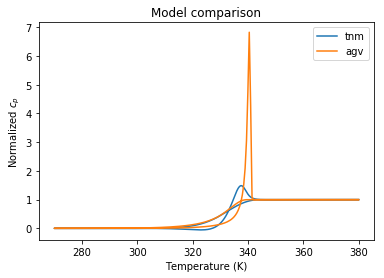

In [11]:
plt.plot(tpd.Tsystem,tpd.cpnorm,tpd2.Tsystem,tpd2.cpnorm)
plt.legend(['tnm','agv'])
plt.xlabel('Temperature (K)')
plt.ylabel('Normalized $c_p$')
plt.title('Model comparison')
plt.show()

Moreover, once we have defined the thermal history, we can rerun the simulation for a different set of parameters to see its effect.

Info: Using the parameters [-125, 0.4, 0.8, 42638]
Info: Using the parameters [-125, 0.6000000000000001, 0.8, 42638]
Info: Using the parameters [-125, 0.8, 0.8, 42638]
Info: Using the parameters [-125, 1.0, 0.8, 42638]


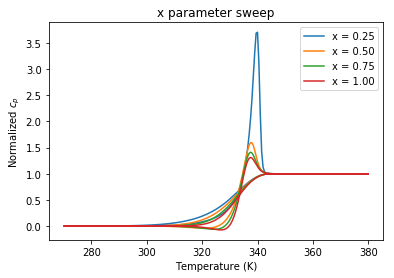

In [12]:
N = 4 # Number of steps for the sweep
temperatures = np.zeros((tpd.index_lasttt,N))
cpnorms =  np.zeros((tpd.index_lasttt,N))
for i in range(N):
    tpd.set_parameters([-125, 0.4 + 0.2*i, 0.8, 42638])
    tpd.start_treatment()
    temperatures[:,i] = tpd.Tsystem
    cpnorms[:,i] = tpd.cpnorm
plt.plot(temperatures,cpnorms)
plt.legend(['x = {:.2f}'.format(0.25 + 0.25*i) for i in range(N)])
plt.xlabel('Temperature (K)')
plt.ylabel('Normalized $c_p$')
plt.title('x parameter sweep')
plt.show()

Or the equivalent for the 'agv' model 

Info: Using the parameters [11.5, 258.9, 0.8, -19.2]
Info: Using the parameters [13.5, 258.9, 0.8, -19.2]
Info: Using the parameters [15.5, 258.9, 0.8, -19.2]
Info: Using the parameters [17.5, 258.9, 0.8, -19.2]


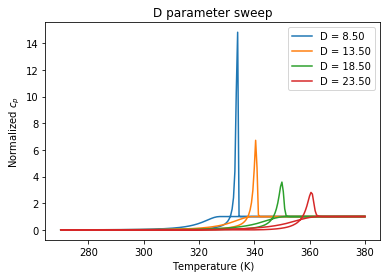

In [13]:
%matplotlib inline
N = 4 # Number of steps for the sweep
temperatures = np.zeros((tpd2.index_lasttt,N))
cpnorms =  np.zeros((tpd2.index_lasttt,N))
for i in range(N):
    D = 13.5 +(i-1) *2
    tpd2.set_parameters([D, 258.9, 0.8, -19.2])
    tpd2.start_treatment()
    temperatures[:,i] = tpd2.Tsystem
    cpnorms[:,i] = tpd2.cpnorm
plt.plot(temperatures,cpnorms)
plt.legend(['D = {:.2f}'.format(13.5 +(i-1) *5) for i in range(N)])
plt.xlabel('Temperature (K)')
plt.ylabel('Normalized $c_p$')
plt.title('D parameter sweep')
plt.show()

Info: Using the parameters [13.5, 228.89999999999998, 0.8, -19.2]
Info: Using the parameters [13.5, 238.89999999999998, 0.8, -19.2]
Info: Using the parameters [13.5, 248.89999999999998, 0.8, -19.2]
Info: Using the parameters [13.5, 258.9, 0.8, -19.2]
Info: Using the parameters [13.5, 268.9, 0.8, -19.2]


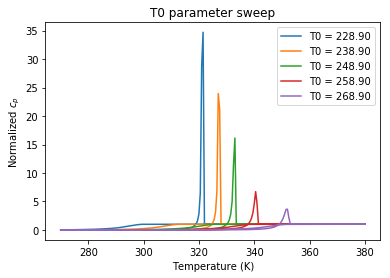

In [14]:
%matplotlib inline
N = 5 # Number of steps for the sweep
temperatures = np.zeros((tpd2.index_lasttt,5))
cpnorms =  np.zeros((tpd2.index_lasttt,5))
for i in range(N):
    T0 = 258.9 +(i-3) * 10
    tpd2.set_parameters([13.5, T0, 0.8, -19.2])
    tpd2.start_treatment()
    temperatures[:,i] = tpd2.Tsystem
    cpnorms[:,i] = tpd2.cpnorm
plt.plot(temperatures,cpnorms)
plt.legend(['T0 = {:.2f}'.format(258.9 +(i-3) * 10) for i in range(N)])
plt.xlabel('Temperature (K)')
plt.ylabel('Normalized $c_p$')
plt.title('T0 parameter sweep')
plt.show()

## Refining the temperature step in a specific range

Let's supose that you have a very stable glass, therefore the overshoot is very sharp, and you need a finer $\Delta T$ to get better results. Defining a small $\Delta T$ for a whole heating range will greatly inrease the amount of computing time. Instead, you can split the heating ramp into several ramps, having each one the wanted $\Delta T$. A previous scan with a rougher $\Delta T$ can be performed in order to determine the $T$ region that should be refined.

Info: your glass will obey the agv  relaxation model
Info: Using the parameters [13.491695635380458, 258.9, 0.8, -19.2]
Info: preparing  cooling scan at 1e+01 K/min
Info: preparing  heating scan at 1e+01 K/min
Info: preparing  heating scan at 1e+01 K/min
Info: preparing  heating scan at 1e+01 K/min


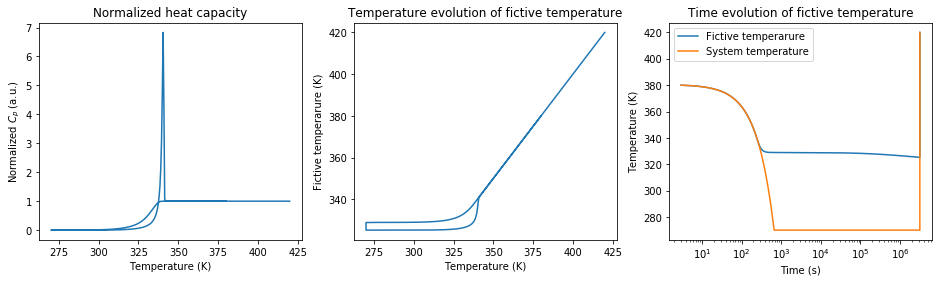

In [15]:
T0       = 258.9
D     =  3493 / T0
tau0 = -19.2
beta = 0.8
p = [D, T0, beta, tau0]
tpd3 = Glass(model = 'agv', parameters=p)
tpd3.ramp(-10,270,380) # We cool the glass at 10 K/min t0 270 K sarting from 380 K
tpd3.annealing(-2,5,500) # We perform an annealing of 100000 s using 500 steps
tpd3.ramp(10,370) # We heat our sample at 10 K/min up to 380 K again
tpd3.ramp(10,385, step=0.05) # We heat our sample at 10 K/min up to 380 K again
tpd3.ramp(10,420)
tpd3.start_treatment()
tpd3.plot_report()